In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
travel = pd.read_excel('../data/2019여행상관관계.xlsx', index_col=0)
travel.head()

,코스,혼자,가족,우정,봄,여름,가을,겨울,힐링,감성,낭만,즐거운,박,당일치기,기차,뚜벅,체험,맛
여행지,,,,,,,,,,,,,,,,,,
제주도,7,3,3,0,4,1,3,6,1,1,3,1,4,0,3,3,0,0
여수,7,0,1,1,2,2,4,0,1,0,0,0,5,0,0,1,0,0
강원도,3,1,0,2,0,1,0,4,0,0,1,0,3,0,0,0,0,0
부산,8,1,0,0,1,2,0,2,0,0,0,2,12,1,0,0,0,2
경주,3,0,1,0,0,0,1,0,0,0,0,0,5,1,1,0,1,2


In [4]:
travel1 = pd.pivot_table(travel, index='여행지', aggfunc=np.sum)
travel1.head()

,가을,가족,감성,겨울,기차,낭만,당일치기,뚜벅,맛,박,봄,여름,우정,즐거운,체험,코스,혼자,힐링
여행지,,,,,,,,,,,,,,,,,,
강릉,0,1,0,2,0,2,1,0,3,3,0,2,0,0,0,2,1,0
강원도,0,0,0,4,0,1,0,0,0,3,0,1,2,0,0,3,1,0
경주,1,1,0,0,1,0,1,0,2,5,0,0,0,0,1,3,0,0
곡성,0,0,0,2,1,0,0,0,0,3,0,0,0,0,0,2,0,0
군산,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [5]:
from sklearn import preprocessing

col = ['코스', '혼자', '가족', '우정', '봄', '여름', '가을', '겨울', '힐링', '감성', '낭만', '박', '당일치기', '기차', '뚜벅', '체험', '맛']

x = travel1[col].values
min_max_scaler = preprocessing.MinMaxScaler() #MinMaxScaler값을 0과 1사이로

x_scaled = min_max_scaler.fit_transform(x.astype(float))
travel1_norm = pd.DataFrame(x_scaled, columns =col, index = travel1.index)
travel1_norm.head()

,코스,혼자,가족,우정,봄,여름,가을,겨울,힐링,감성,낭만,박,당일치기,기차,뚜벅,체험,맛
여행지,,,,,,,,,,,,,,,,,
강릉,0.250,0.333333,0.333333,0.0,0.0,1.0,0.00,0.333333,0.0,0.0,0.666667,0.250000,0.5,0.000000,0.0,0.000000,1.000000
강원도,0.375,0.333333,0.000000,1.0,0.0,0.5,0.00,0.666667,0.0,0.0,0.333333,0.250000,0.0,0.000000,0.0,0.000000,0.000000
경주,0.375,0.000000,0.333333,0.0,0.0,0.0,0.25,0.000000,0.0,0.0,0.000000,0.416667,0.5,0.333333,0.0,0.333333,0.666667
곡성,0.250,0.000000,0.000000,0.0,0.0,0.0,0.00,0.333333,0.0,0.0,0.000000,0.250000,0.0,0.333333,0.0,0.000000,0.000000
군산,0.000,0.333333,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,1.0,0.000000,0.083333,0.5,0.000000,0.0,0.000000,0.000000


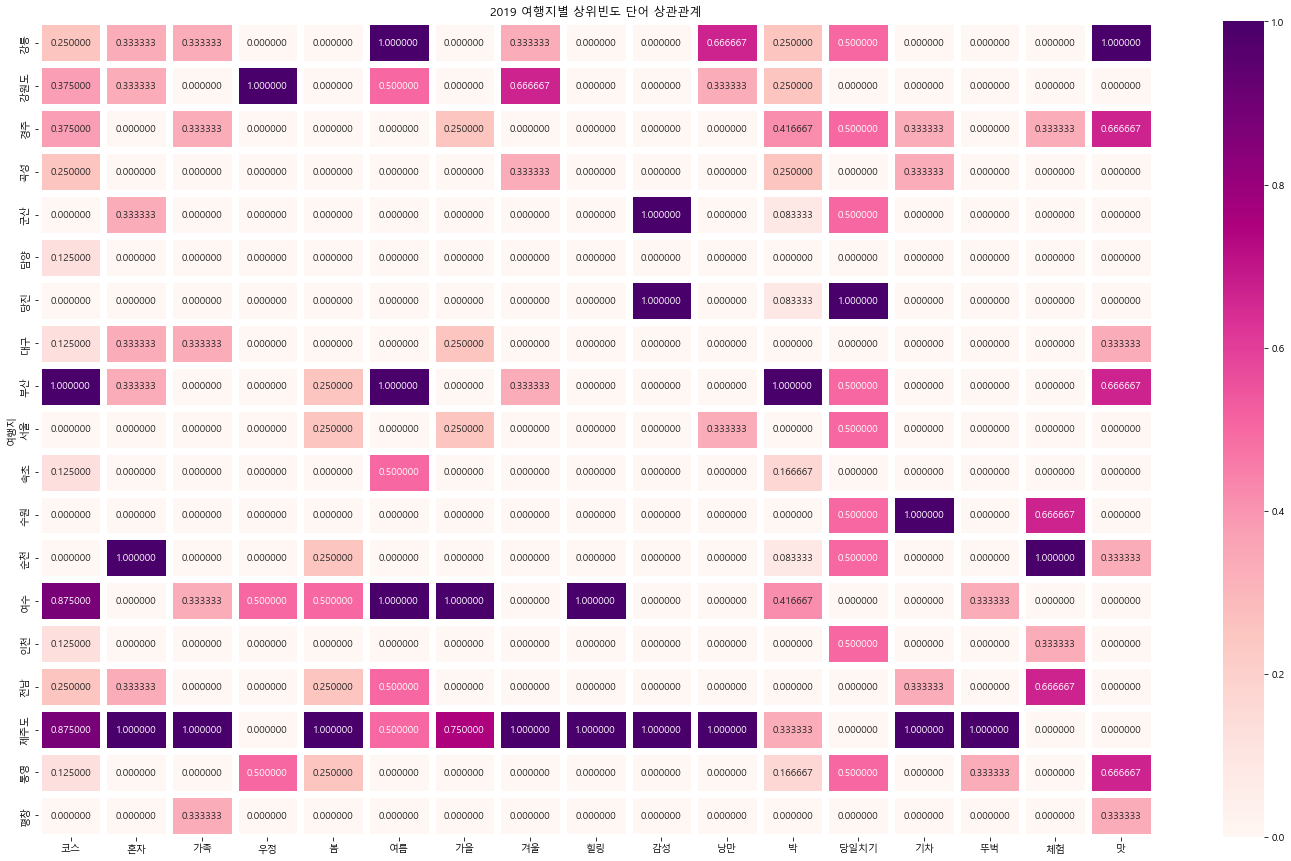

In [6]:
target_col = ['코스', '혼자', '가족', '우정', '봄', '여름', '가을', '겨울', '힐링', '감성', '낭만', '박', '당일치기', '기차', '뚜벅', '체험', '맛']

plt.figure(figsize = (25,15))
sns.heatmap(travel1_norm[target_col], annot=True, fmt='f',
            linewidths=7, cmap='RdPu') #cmap='RdPu' 칼라RdYlGn_r
plt.title('2019 여행지별 상위빈도 단어 상관관계')
plt.show()